Author: Sofia Guerrero


The purpose of this Jupyter Notebook is to create a Neural Network Model to classify if a new customer is most likely to stay at the bank or not given its information.

Let's find out! 

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score


# Dataset:

In [2]:
df = pd.read_csv('FINAL-churn-model-cleaned.csv')
df.head(10)



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.0,0.0
5,645,44,8,113755.78,2,1,0,149756.71,1,0.0,1.0
6,822,50,7,0.00,2,1,1,10062.80,0,0.0,1.0
7,501,44,4,142051.07,2,0,1,74940.50,0,0.0,1.0
8,684,27,2,134603.88,1,1,1,71725.73,0,0.0,1.0
9,528,31,6,102016.72,2,0,0,80181.12,0,0.0,1.0


In [3]:
df.isna().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Gender_Female      0
Gender_Male        0
dtype: int64

# Scaling the data.


Here, I will drop Exited since it is the predicted label.

- Also, for the columns: HasCrCard, IsActiveMember, Gender_Female, Gender_Male, they are binary colums so it's not necessary to scale.



In [4]:
columns_to_scale = df.drop(columns=["Exited"]).columns
columns_to_scale

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [5]:
columns_to_scale = ["CreditScore", "Age", "Tenure", 'Balance', 'NumOfProducts',
        'EstimatedSalary']
columns_to_scale

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

__Standard Scaler__

In [6]:
pd.set_option('display.max_rows', 10)
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [7]:
df[columns_to_scale]

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,-0.329808,0.485534,-1.044203,-1.224651,-0.938614,0.021813
1,-0.444286,0.371671,-1.390497,0.118145,-0.938614,0.216419
2,-1.547436,0.485534,1.033562,1.333486,2.699489,0.240567
3,0.502758,0.143947,-1.390497,-1.224651,0.880438,-0.108963
4,2.074226,0.599396,-1.044203,0.786324,-0.938614,-0.365266
...,...,...,...,...,...,...
9563,1.252067,0.143947,-0.005320,-1.224651,0.880438,-0.066473
9564,-1.401737,-0.311503,1.726151,-0.305457,-0.938614,0.027914
9565,0.606829,-0.197641,0.687268,-1.224651,-0.938614,-1.008495
9566,1.262474,0.485534,-0.697909,-0.021770,0.880438,-0.125272


In [8]:
df.head(25)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male
0,-0.329808,0.485534,-1.044203,-1.224651,-0.938614,1,1,0.021813,1,1.0,0.0
1,-0.444286,0.371671,-1.390497,0.118145,-0.938614,0,1,0.216419,0,1.0,0.0
2,-1.547436,0.485534,1.033562,1.333486,2.699489,1,0,0.240567,1,1.0,0.0
3,0.502758,0.143947,-1.390497,-1.224651,0.880438,0,0,-0.108963,0,1.0,0.0
4,2.074226,0.599396,-1.044203,0.786324,-0.938614,1,1,-0.365266,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
20,-0.152888,-0.653091,1.033562,-1.224651,0.880438,1,0,0.668660,0,1.0,0.0
21,-1.464179,0.030084,-0.351615,-1.224651,-0.938614,1,0,0.327179,1,1.0,0.0
22,0.190546,0.940984,-0.697909,-1.224651,0.880438,0,1,-1.592602,0,0.0,1.0
23,2.032598,0.030084,-0.005320,-1.224651,-0.938614,1,1,1.521593,0,1.0,0.0


In [9]:
df.dtypes

CreditScore        float64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
                    ...   
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Gender_Female      float64
Gender_Male        float64
Length: 11, dtype: object

In [10]:
df.isna().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
                  ..
IsActiveMember     0
EstimatedSalary    0
Exited             0
Gender_Female      0
Gender_Male        0
Length: 11, dtype: int64

In [11]:
df.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male
0,-0.329808,0.485534,-1.044203,-1.224651,-0.938614,1,1,0.021813,1,1.0,0.0
1,-0.444286,0.371671,-1.390497,0.118145,-0.938614,0,1,0.216419,0,1.0,0.0
2,-1.547436,0.485534,1.033562,1.333486,2.699489,1,0,0.240567,1,1.0,0.0
3,0.502758,0.143947,-1.390497,-1.224651,0.880438,0,0,-0.108963,0,1.0,0.0
4,2.074226,0.599396,-1.044203,0.786324,-0.938614,1,1,-0.365266,0,1.0,0.0
5,-0.059224,0.713259,1.033562,0.597981,0.880438,1,0,0.863396,1,0.0,1.0
6,1.782828,1.396434,0.687268,-1.224651,0.880438,1,1,-1.565220,0,0.0,1.0
7,-1.557843,0.713259,-0.351615,1.051337,0.880438,0,1,-0.437304,0,0.0,1.0
8,0.346652,-1.222403,-1.044203,0.932016,-0.938614,1,1,-0.493193,0,0.0,1.0
9,-1.276852,-0.766953,0.340974,0.409894,0.880438,0,0,-0.346194,0,0.0,1.0


__Saving Scaler:__

In [12]:
filename = 'scaler_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(scaler, file)
    
    


# Splitting

Split the dataset into Train and Test dataframe with the ratio of 75% for Train and 25% for Test. Also report how many records exist in both train and test dataframes.



__Splitting Train and Test Data__

In [13]:
X = df.drop(columns=['Exited'])
y = df['Exited']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Number of records in train DataFrame:", len(X_train))
print("Number of records in test DataFrame:", len(X_test))

Number of records in train DataFrame: 7176
Number of records in test DataFrame: 2392


# Neural Network

Designing a Neural Network Classifier to identify if a customer leave (exit) the bank with the following parameters:

-	Set 15% of training as Validation dataset
-	Set a minimum of 2 hidden layers.



__Neural Network Classifier__

In [14]:
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Separate the features 'X' and target variable 'y'
X = df.drop('Exited', axis=1)  # Assuming 'Exited' is the target variable
y = df['Exited']

# Split the data into train-validation-test sets (70% training, 15% validation, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the neural network classifier
model = MLPClassifier(random_state=42,
                      max_iter=1000,
                      hidden_layer_sizes=(30, 60),
                      activation='logistic',
                      validation_fraction=0.15,
                      n_iter_no_change=200,
                      early_stopping=True,
                      verbose=True)

# Train the classifier
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Iteration 1, loss = 0.55694516
Validation score: 0.803980
Iteration 2, loss = 0.49366597
Validation score: 0.803980
Iteration 3, loss = 0.49021410
Validation score: 0.803980
Iteration 4, loss = 0.48704511
Validation score: 0.803980
Iteration 5, loss = 0.48344497
Validation score: 0.803980
Iteration 6, loss = 0.47918173
Validation score: 0.803980
Iteration 7, loss = 0.47400055
Validation score: 0.803980
Iteration 8, loss = 0.46782305
Validation score: 0.803980
Iteration 9, loss = 0.46046010
Validation score: 0.803980
Iteration 10, loss = 0.45240676
Validation score: 0.803980
Iteration 11, loss = 0.44306622
Validation score: 0.803980
Iteration 12, loss = 0.43538321
Validation score: 0.803980
Iteration 13, loss = 0.42686988
Validation score: 0.808955
Iteration 14, loss = 0.42060384
Validation score: 0.813930
Iteration 15, loss = 0.41569184
Validation score: 0.816915
Iteration 16, loss = 0.41264815
Validation score: 0.818905
Iteration 17, loss = 0.41024225
Validation score: 0.821891
Iterat

In [15]:
X_temp.shape

(2871, 10)

Ater running multiple times the model, adjusting the hyper-paramenters, I realized that the best perfomance is using the Logistic Activtion Function. While ReLu generates a similar output, Logistic iterates more in the model (double # of iterations approx) and is also more appropiate for a binary classifier like this example. 

- As for the hidden layers, I picked two since the data set is small. I also adjusted to different sizes as 50-100, 25-50, 25,50,75 but found that 30 nodes and 60 nodes perfoms better. 

- Since I'm the logistic activation function for binary classification, the output layer will have a single node.

# Plotting the Loss Curve

Plot the loss curve of the Neural Network model over the iterations.



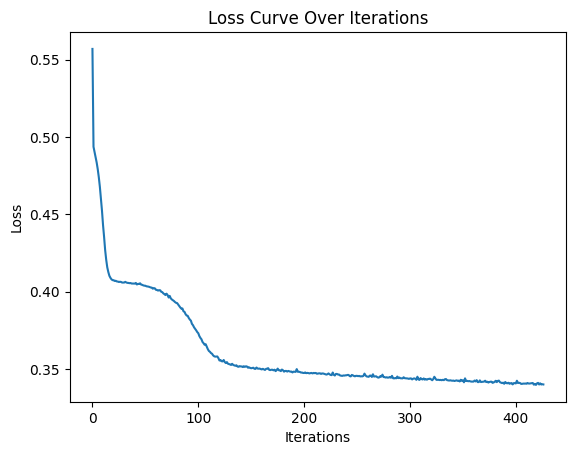

In [16]:
plt.plot(model.loss_curve_)
plt.title("Loss Curve Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

- At the beginning, the curve as usual, drops dramatically since it is the beginning of running the model, so it is learning. 
- Starts from 0.55 and goes to 0.37 by the iteration 100. Then, it becomes more stable and does not change that much until the final result when it stops at 0.37
- We see como fluctuations around the iteration 100 but then it kinda stabilize and does not get much lower.

# Metrics

In [17]:
model.score(X_train, y_train)

0.8560549499776019

__Confusion Matrix__

In [18]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
cm

array([[1110,   32],
       [ 177,  117]], dtype=int64)

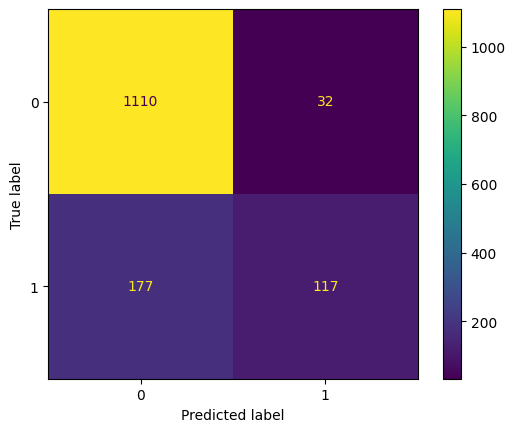

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [20]:
X_test.shape

(1436, 10)

From this Confusion Matrix, we can see that:
    
- True Positives: 117 were correclty classified as positive.
- True Negatives: 1110  predicted as Negative and they were negative. 
- False Positive: 32 of incorrect classifications of negative examples.
- False Negative: 117 of incorrect classification of positive examples.

__Prediction Score__

In [21]:
train_score = model.score(X_train, y_train)
validation_score = model.score(X_temp, y_temp)
test_score = model.score(X_test, y_test)
print(f"The Train Score of 15% of the data set is: {train_score}")
print(f"The Validation Score of 15% of the data set is: {validation_score}")
print(f"The Test Score of 15% of the data set is: {test_score}")

The Train Score of 15% of the data set is: 0.8560549499776019
The Validation Score of 15% of the data set is: 0.8596307906652734
The Test Score of 15% of the data set is: 0.8544568245125348


__F1 Score__

In [22]:
f1 = f1_score(y_test, predictions)
f1

0.5282167042889391

# Model Explanation and Perfomance:

In general the model is good given the following metrics:

- F1 Score: The F1 score (0.5282) suggests the model is somewhat balanced in making correct positive predictions, but there's room to improvement.

- The scores for training, validation, and test sets are similar (aorund 85% all of them), which is good. It's consistent. 

- Confusion Matrix: The model is making both correct and incorrect predictions. It could improve in identifying positive cases (117 missed) and negative cases (32 mistaken).

__Improvements__:

- Experiment with different hyperparameter: such as the number of hidden layers, nodes, learning rate, and activation functions.
- It is important to focus on avoiding false positives or false negatives, working on the precision and recall.
- Take more time to run the model multiple times trying different hyperparamenter combinations. 

Saving the classifier model in a separate pickle file

In [23]:
filename = 'Trained_classifier.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

# New Prediction:

Predict the customer churn (should we say goodbye) for the following customer:

 
Geography	                              France
Credit Score	                          600
Gender	                                  male
Tenure	                                  3 years
Number of Products	                      2
Does this customer have a credit card?	 Yes
Is this customer an Active Member?	     Yes
Estimated Salary?	                     50,000



In [24]:
#df["Gender"] = 'Male'
#df["Geography"] = 'France'

__Loading Objects__

In [25]:
with open('scaler_model.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

with open('encoder.pkl', 'rb') as encoder_file:
    encoder = pickle.load(encoder_file)

# Load the trained classifier
with open('trained_classifier.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

__User Information__

Handling missing age and balance:

In [26]:
age_mean = df['Age'].mean()
print(age_mean)
balance_mean = df['Balance'].mean()
print(balance_mean)

3.3418084353265582e-18
-3.37893964016352e-17


In [35]:
new_customer_data =  {
    'CreditScore': 600,
    'Age': age_mean,
    'Tenure': 3,
    'Balance': balance_mean,  
    'NumOfProducts': 2,
    'HasCrCard': 'yes',
    'IsActiveMember': '1',
    'EstimatedSalary': 50000,
    #'Exited': 0,   
   # 'Gender_Female': 0,
    #'Gender_Male': 1,
    #'Geography' : 'France',
    #'Gender' : 'Male'
    
}

__Data frame__

In [36]:
new_customer_df = pd.DataFrame([new_customer_data])
new_customer_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,600,3.341808e-18,3,-3.378940e-17,2,yes,1,50000


In [38]:
new_customer_df['Gender'] = ['male']
new_customer_df['Geography'] = ['France']
new_customer_df


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender,Geography
0,600,3.341808e-18,3,-3.378940e-17,2,yes,1,50000,male,France


In [39]:
# Apply one-hot encoding to the 'Gender' and 'Geography' columns
categorical_features = ["Gender", "Geography"]
encoded_data = encoder.transform(new_customer_df[categorical_features])
encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_data,
                                               columns=encoder.get_feature_names_out(categorical_features))

# Drop the temporary 'Gender' and 'Geography' columns
new_customer_df = new_customer_df.drop(columns=categorical_features)

# Concatenate the encoded categorical columns and the rest of the DataFrame
new_customer_df = pd.concat([new_customer_df, encoded_df], axis=1)

print(new_customer_df)









   CreditScore           Age  Tenure       Balance  NumOfProducts HasCrCard  \
0          600  3.341808e-18       3 -3.378940e-17              2       yes   

  IsActiveMember  EstimatedSalary  Gender_Female  Gender_Male  \
0              1            50000            0.0          0.0   

   Geography_France  Geography_Germany  Geography_Spain  
0               1.0                0.0              0.0  


__Apply One-Hot-Encoder__

__Scaler__

In [41]:
columns_to_scale = ["CreditScore", "Age", "Tenure", 'Balance', 'NumOfProducts',
        'EstimatedSalary']
df[columns_to_scale] = scaler.transform(df[columns_to_scale])

In [44]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male
0,-6.842297,-4.779627,-2.463453,-1.224671,-10.879824,1,1,-1.740195,1,1.0,0.0
1,-6.842309,-4.781103,-2.504980,-1.224671,-10.879824,0,1,-1.740195,0,1.0,0.0
2,-6.842429,-4.779627,-2.214288,-1.224671,1.158469,1,0,-1.740195,1,1.0,0.0
3,-6.842207,-4.784055,-2.504980,-1.224671,-4.860678,0,0,-1.740195,0,1.0,0.0
4,-6.842037,-4.778151,-2.463453,-1.224671,-10.879824,1,1,-1.740195,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9563,-6.842126,-4.784055,-2.338870,-1.224671,-4.860678,1,0,-1.740195,0,0.0,1.0
9564,-6.842413,-4.789960,-2.131233,-1.224671,-10.879824,1,1,-1.740195,0,0.0,1.0
9565,-6.842196,-4.788484,-2.255815,-1.224671,-10.879824,0,1,-1.740195,1,1.0,0.0
9566,-6.842125,-4.779627,-2.421925,-1.224671,-4.860678,1,0,-1.740195,1,0.0,1.0


In [47]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male
0,-6.842297,-4.779627,-2.463453,-1.224671,-10.879824,1,1,-1.740195,1.0,0.0
1,-6.842309,-4.781103,-2.504980,-1.224671,-10.879824,0,1,-1.740195,1.0,0.0
2,-6.842429,-4.779627,-2.214288,-1.224671,1.158469,1,0,-1.740195,1.0,0.0
3,-6.842207,-4.784055,-2.504980,-1.224671,-4.860678,0,0,-1.740195,1.0,0.0
4,-6.842037,-4.778151,-2.463453,-1.224671,-10.879824,1,1,-1.740195,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9563,-6.842126,-4.784055,-2.338870,-1.224671,-4.860678,1,0,-1.740195,0.0,1.0
9564,-6.842413,-4.789960,-2.131233,-1.224671,-10.879824,1,1,-1.740195,0.0,1.0
9565,-6.842196,-4.788484,-2.255815,-1.224671,-10.879824,0,1,-1.740195,1.0,0.0
9566,-6.842125,-4.779627,-2.421925,-1.224671,-4.860678,1,0,-1.740195,0.0,1.0


__Apply Neural Network__

In [49]:
result = model.predict(df)
result


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Since I was not given all the features that I used to train my model, I need to come up with an idea to handle these missing values so ill get the mean for age and balance. 

__The result is 0 which means that the customer is more likely to DO NOT stay!__ 

__ THE END <3  __ 